# KNN 분류

## 사용 데이터

* 2차원 데이터

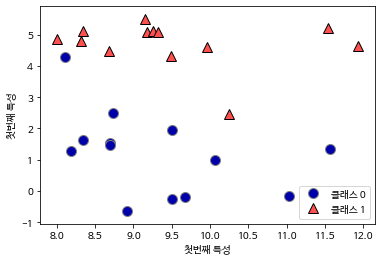

In [1]:
from ml1.preamble import*

# forge data

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫번째 특성")
plt.ylabel("첫번째 특성")
plt.show()

* 고차원 데이터

In [2]:
# cancer data

from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()

## 원리

* k개의 가장 가까운 이웃중 빈도수가 높은 클래스로 예측 

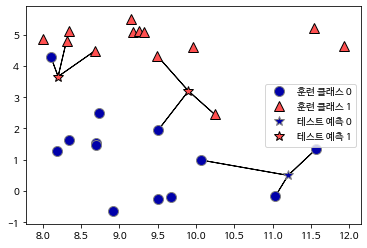

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## 코드

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train,y_train)

print(f'테스트 세트 정확도 : {clf.score(X_test,y_test):.2f}')

테스트 세트 정확도 : 0.86


## 분석
<br>

* n_neighbors의 변화에 따른 경계선 시각화

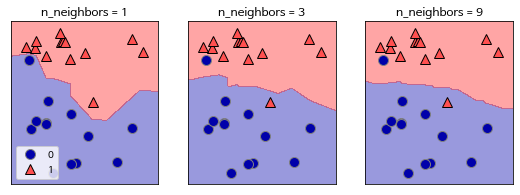

In [5]:
fig, axes = plt.subplots(1,3, figsize=(9,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=.4, ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title(f'n_neighbors = {n_neighbors}')
axes[0].legend(loc=3)

* n_neighbor의 변화 따른 train set와 test set 정확도 시각화

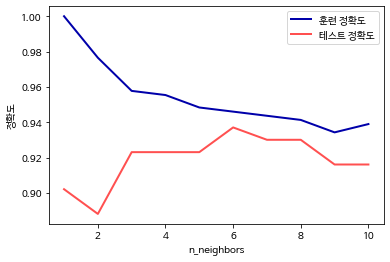

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=66, 
                                                    stratify=cancer.target)      # class의 비율과 동일하게 split

training_accuracy, test_accuracy = [], []
n_neighbors_range = range(1, 11)
for n_neighbors in n_neighbors_range:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_neighbors_range, training_accuracy, label = "훈련 정확도")
plt.plot(n_neighbors_range, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

**결론 : n_neighbors 가 적을수록 모델의 복잡도가 증가하고 과대적합된다.**

# KNN 회귀

## 사용 데이터

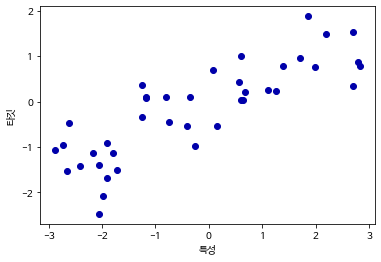

In [7]:
# wave data

X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show()

## 원리

* k 개의 가장 가까운 이웃의 평균값

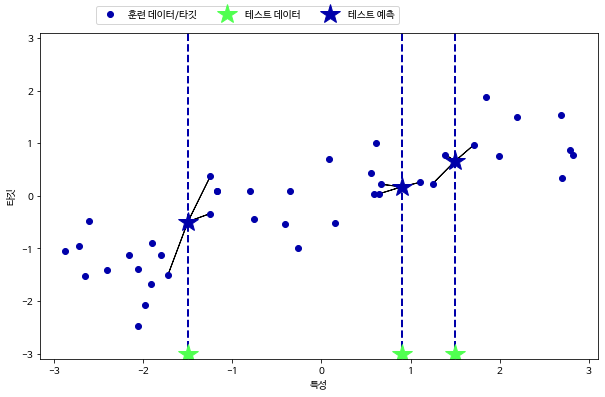

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## 코드

In [9]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print(f'테스트 세트 정확도 : {reg.score(X_test,y_test):.2f}')   # R^2

테스트 세트 정확도 : 0.83


## 분석

* n_neighbors에 따른 예측선 시각화

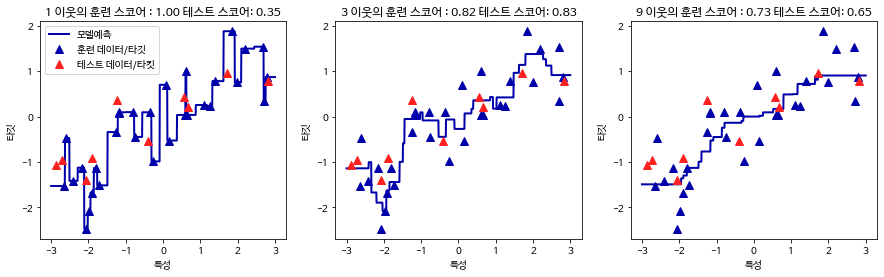

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
x = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train,y_train)
    ax.plot(x, reg.predict(x))
    ax.plot(X_train,y_train,'^', c = mglearn.cm2(0), ms=8)
    ax.plot(X_test,y_test,'^', c = mglearn.cm2(1), ms=8)
    ax.set_title(f'{n_neighbors} 이웃의 훈련 스코어 : {reg.score(X_train, y_train):.2f} 테스트 스코어: {reg.score(X_test, y_test):.2f}')
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델예측','훈련 데이터/타깃','테스트 데이터/타킷'])

**결론: n_neighbors가 작아질수록 불안정한 예측을 만듬**

# 중요한 매개변수

1. n_neighbors  
이웃 수 : 3~5 정도로 적을 때 잘 작동함 
  
  
2. metric :  
거리 재는 방법 : 기본적으로는 유클리디안 거리 방식

# 장단점

**1.장점**

* 쉬움

**2. 단점**

* 훈련 세트가 크면 예측이 느림
* 전처리 중요
* 특성이 많은 데이터셋에 부적합
* 희소한 데이터셋에 부적합